# Prediction - regression and classification

Line:

%matplotlib inline

allows you to display charts without using plt.show()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Linear Regression
This method assumes that the relationship between the explained and the explanatory variable is linear, i.e. we are trying to find the function:

y = a * x + b

that best describes the points from the set, where:

- y - explained variable,
- x - explanatory variable,
- a - slope coefficient,
- b - intercept.

For the regression example, we will use generated points randomly spaced from the line with slope coefficient a = 2 and intercept b = -3.

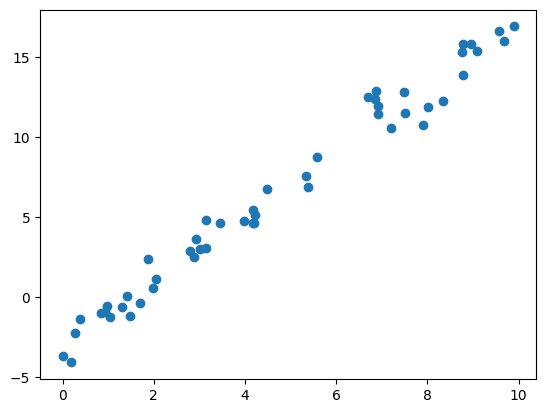

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 3 + rng.randn(50)
plt.scatter(x, y);

We import the model for linear regression from the scikit-learn package (sklearn) and create the appropriate object. When creating an object, we can set values for the model's hyperparameters. One of such parameters is *fit_intercept*, which indicates whether the model should determine the value for the intercept **b**.

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

The explanatory data should have dimension $<$number of samples$>$ x $<$number of dimensions/features$>$, so we need to change the dimensions for **x**.

In [4]:
X = x[:, np.newaxis]
X.shape

(50, 1)

We train the model on the data. We can view the determined values for model parameters **a** and **b**.

In [5]:
model.fit(X, y)
# a
model.coef_ 

array([2.02720881])

In [6]:
#b
model.intercept_ 

-2.9985770855532

And the accuracy of the model.

In [7]:
model.score(X, y)

0.9790800609430612

Applying the designated linear regression model to "new" data.

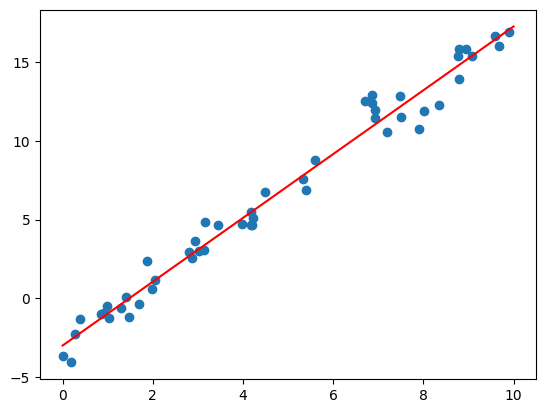

In [8]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Visualization of results
plt.scatter(x, y)
plt.plot(xfit, yfit,'-r');

### Task 1. (0.5 points)
> Using a phone company's data and a linear regression model, determine an exact per-minute rate.

#### Answer to the question
> The relationship coefficient, and the slope of the function should be equal to:  0.90291295

We are looking for the relationship between body weight and brain weight for mammals in the form of a function:

y = a * x,

where *x* means brain weight and *y* means body weight.

We load the appropriate file.

In [9]:
import pandas as pd

df = pd.read_csv('brain_body.csv', index_col='Index')
df.head()

,BrainWeight,BodyWeight
Index,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


After loading the file, we can delve into establishing the Linear Regression Model

In [10]:
# Firstly, we establish a linear regression model to determine the slope
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Similarily to aforementioned instrunctions we establish dimensionality of the independent variable

In [12]:
# Secondly, explanatory variable needs to have dimensionality accounted for.
X_body = np.array(df['BodyWeight'])[:, np.newaxis]
X_body.shape

(62, 1)

After transforming features vector, we can fit the model and establish slope of the function.

In [13]:
# Then, we fit the model
model.fit(X_body, np.array(df['BrainWeight']))
model.coef_

array([0.90291295])

### Task 2. (0.5 points)
> Investigate whether there is a correlation between the variables under study.

To do that, first let's have a look at the data:

<Axes: xlabel='BodyWeight', ylabel='BrainWeight'>

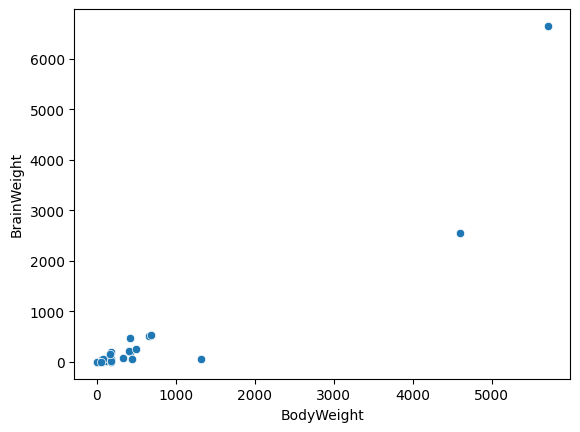

In [14]:
import seaborn as sns
sns.scatterplot(df, x='BodyWeight', y='BrainWeight')

The data seems to be tightly coupled at low dimension values, but the overall trend seems to be following a linear function.  
Before checking let's determine if there are any null values and outliers.

In [18]:
print(df.isnull().sum())
print(df.describe())

BrainWeight    0
BodyWeight     0
dtype: int64
       BrainWeight   BodyWeight
count    62.000000    62.000000
mean    198.789984   283.134194
std     899.158011   930.278942
min       0.005000     0.140000
25%       0.600000     4.250000
50%       3.342500    17.250000
75%      48.202500   166.000000
max    6654.000000  5712.000000


Good, there's no null values. Let's use statistical methods to determine outliers.

In [19]:
def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [20]:
outliers = [find_outliers_IQR(df["BodyWeight"]), find_outliers_IQR(df["BrainWeight"])]

In [21]:
print("Number of outliers:")
print("Body Weight: " + str(len(outliers[0])))
print("Brain Weight: " + str(len(outliers[1])))
print("Max outlier values:")
print(outliers[0].max())
print(outliers[1].max())
print("Min outlier values:")
print(outliers[0].min())
print(outliers[1].min())
outliers

Number of outliers:
Body Weight: 9
Brain Weight: 10
Max outlier values:
5712.0
6654.0
Min outlier values:
419.0
160.0


[Index
 4      423.0
 19    4603.0
 21     419.0
 22     655.0
 28     680.0
 32    1320.0
 33    5712.0
 42     490.0
 46     440.0
 Name: BodyWeight, dtype: float64,
 Index
 4      465.0
 19    2547.0
 21     187.1
 22     521.0
 28     529.0
 29     207.0
 33    6654.0
 42     250.0
 56     192.0
 58     160.0
 Name: BrainWeight, dtype: float64]

There seems to be 9 outliers in Body Weight and 10 outliers in Brain Weight.  
Let's determine correlation with and without outliers.

In [28]:
def remove_outliers(df, column, multiplier=1.5):

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper and lower bounds
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)

    # Filter the DataFrame to remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

In [29]:
print(df["BodyWeight"].corr(df["BrainWeight"]))
df = remove_outliers(df, "BrainWeight")
df = remove_outliers(df, "BodyWeight")
print(df["BodyWeight"].corr(df["BrainWeight"]))

0.9341638423233545
0.7323341160255473


As we can see correlation with outliers is a very strong one.  
Without the correlation is lower, another approach would be to change values to upper and lower limits instead of dropping outliers alltogether.

### Task 3. (0.5 points)
> Create a linear regression model object suitable for the dependencies in the above problem.
>
> Prepare the explanatory variable (name it *X*) and the explained variable (name it *y*) appropriately.

In [30]:
df = pd.read_csv('brain_body.csv', index_col='Index')
df.head()

model = LinearRegression(fit_intercept=True)
model

# Secondly, explanatory variable needs to have dimensionality accounted for.
X = np.array(df['BodyWeight'])[:, np.newaxis]
X.shape

y = np.array(df['BrainWeight'])

We divide the dataset into test and training sets.

In [31]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.6)
print ('Size of training set = %d and test set = %d' % (y1.size, y2.size))

Size of training set = 37 and test set = 25


We train and evaluate the model using mean squared error.

In [32]:
from sklearn.metrics import mean_squared_error

model.fit(X1, y1)
y2_model = model.predict(X2)

mean_squared_error(y2, y2_model)

499034.53515982797

Visualization of results.

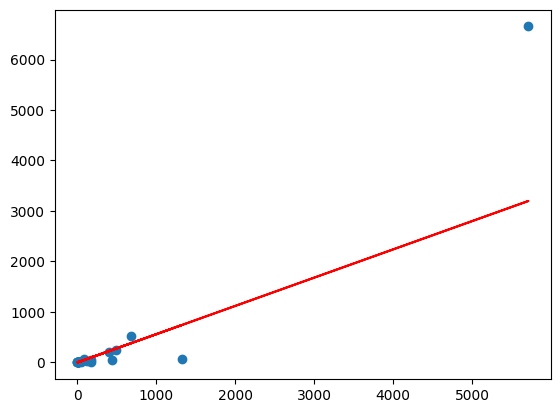

In [33]:
plt.scatter(X2, y2)
plt.plot(X2, y2_model,'-r');

### Task 4. (1.5 points)
> Remove outlying points from the analyzed data set and repeat the regression. Compare the results. Also compare the accuracy of the model on training and test data.

In [41]:
def remove_outliers_two_columns(df, col1, col2, multiplier=1.5):

    # Calculate IQR for the first column (col1)
    Q1_col1 = df[col1].quantile(0.25)
    Q3_col1 = df[col1].quantile(0.75)
    IQR_col1 = Q3_col1 - Q1_col1
    lower_bound_col1 = Q1_col1 - (multiplier * IQR_col1)
    upper_bound_col1 = Q3_col1 + (multiplier * IQR_col1)

    # Calculate IQR for the second column (col2)
    Q1_col2 = df[col2].quantile(0.25)
    Q3_col2 = df[col2].quantile(0.75)
    IQR_col2 = Q3_col2 - Q1_col2
    lower_bound_col2 = Q1_col2 - (multiplier * IQR_col2)
    upper_bound_col2 = Q3_col2 + (multiplier * IQR_col2)

    # Create a boolean mask to identify rows where both columns are within their respective bounds
    mask = (
            (df[col1] >= lower_bound_col1) & (df[col1] <= upper_bound_col1) &
            (df[col2] >= lower_bound_col2) & (df[col2] <= upper_bound_col2)
    )

    # Filter the DataFrame using the mask
    df_filtered = df[mask]

    return df_filtered

Size of training set = 30 and test set = 20


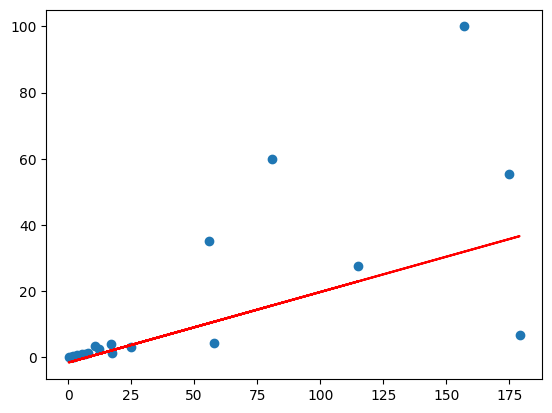

In [44]:
df = pd.read_csv('brain_body.csv', index_col='Index')
df.head()

df = remove_outliers_two_columns(df, "BrainWeight", "BodyWeight")

model = LinearRegression(fit_intercept=True)
model

# Secondly, explanatory variable needs to have dimensionality accounted for.
X = np.array(df['BodyWeight'])[:, np.newaxis]
X.shape

y = np.array(df['BrainWeight'])

from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.6)
print ('Size of training set = %d and test set = %d' % (y1.size, y2.size))

model.fit(X1, y1)

y2_model = model.predict(X2)

mean_squared_error(y2, y2_model)

plt.scatter(X2, y2)
plt.plot(X2, y2_model,'-r');

If the process consists of several stages, the *Pipeline* class can be used.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

The following example defines a process consisting of data transformation (*PolynomialFeatures*) and linear regression.

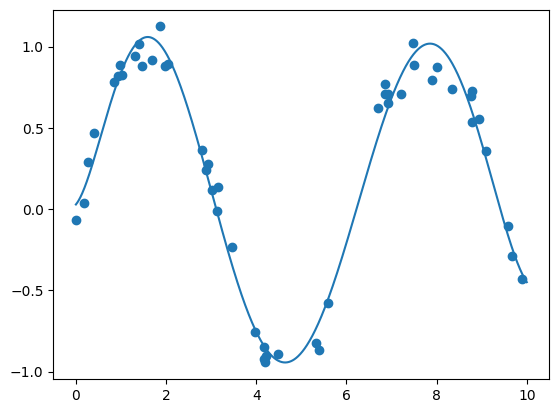

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
def polynomial_features(degree): 
    poly_model = make_pipeline(PolynomialFeatures(degree),
                               LinearRegression())
    
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(50)
    y = np.sin(x) + 0.1 * rng.randn(50)
    
    poly_model.fit(x[:, np.newaxis], y)
    yfit = poly_model.predict(xfit[:, np.newaxis])
    
    plt.scatter(x, y)
    plt.plot(xfit, yfit);
polynomial_features(7)

### Task 5. (0.5 points)
> Test other values (smaller and larger than the example) as an argument when creating an object of the *PolynomialFeatures* class. What can you say about the model's behavior?

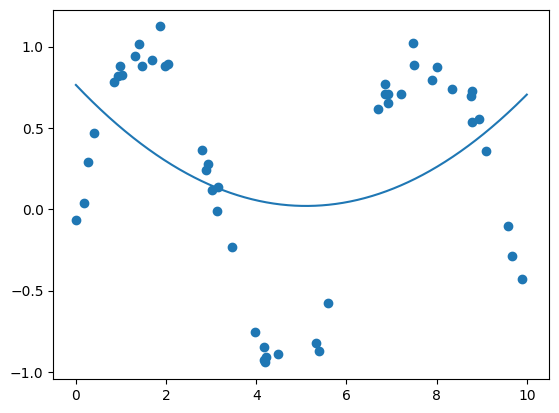

In [57]:
polynomial_features(2)

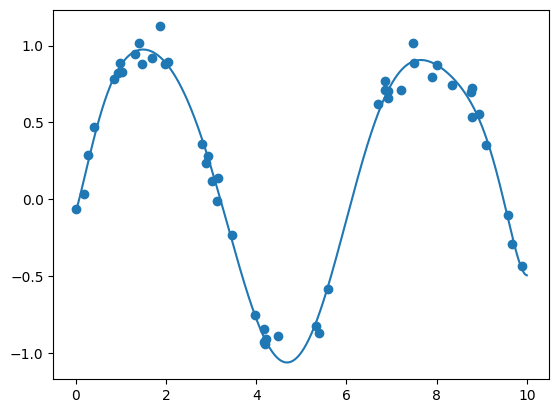

In [58]:
polynomial_features(10)

Degree of complexity of polynomial features behaviour:  
As we can see on the first plot degree of 7 produces a well-fit model.  
Second plot shows that with the lower degree of 2 fit of the model is significantly lower.  
Smaller the degree -> smaller the function dimensionality  
On the third plot we can see however, that even though the degree is 10 there is no significant difference between the first plot.  
Bigger the degree -> the tighter fit of the model.  
This suggests the issue of overfitting the model & requiring too much computational power.  

### Task 6. (1.5 points)
> For the above random data, test the regression with $L_2$ regularization and $L_1$ regularization. Draw a graph and calculate the mean squared and mean absolute errors for the three models. Compare the results.
>
> **NOTE:** Both model error measures are available in the *sklearn.metrics* module.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [ ]:
# your answer here...
from sklearn.linear_model import Ridge # L2
from sklearn.linear_model import Lasso # L1


### Linear regression as a function of two variables

In [ ]:
df = pd.read_csv("boston_data.csv")
df.head()

In [ ]:
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [ ]:
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.8)

In [ ]:
x_train = X1[['RM', 'LSTAT']].values.reshape(-1,2)
x_test = X2[['RM', 'LSTAT']].values.reshape(-1,2)
model = LinearRegression(fit_intercept=False)
model.fit(x_train,y1)
y2_model = model.predict(x_test)
mean_squared_error(y2, y2_model)

### Task 7. (2.5 points)
> Load the *winequality-red.csv* file and divide it into training and testing sets in the ratio of 7:3. Research the correlation between available attributes and wine quality and select several (min. 2) to create a model. If necessary, use a polynomial model. Use the $L_2$ regularization and examine the mean squared and absolute mean errors as well as the coefficient of determination. Compare the results.
>
> **NOTE:** The coefficient of determination is available in the sklearn.metrics module.

In [ ]:
# your answer here...

## Support Vector Machine

In [ ]:
from sklearn import svm

We create sample data.

In [ ]:
X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])
y = [0,1,0,1,0,1]

We create and teach a model.

In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X, y)  

In [ ]:
clf.score(X,y)

Classification of the new point.

In [ ]:
clf.predict([[0.58,0.76]])

In [ ]:
clf.predict([[10.58,10.76]])

In [ ]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, '-r')
plt.scatter(X[:, 0], X[:, 1], c = y)

Getting support vectors.

In [ ]:
clf.support_vectors_

Getting vectors indexes.

In [ ]:
clf.support_ 

Getting the number of support vectors for each class.

In [ ]:
clf.n_support_ 

### Task 8. (2.5 points)
> Perform classification using the SVM method on the *iris* dataset. Divide the data into training and test data in a 4:1 ratio. Test different values for *kernel* ('linear','rbf','poly','sigmoid') and *gamma* (0, 10, 100) for *kernel*='rbf'. Compare accuracy on training and test sets for different model parameters. Also check the *f1* values for the prediction results of the tested models.
>
> **NOTE:** The *f1* measure is available in the *sklearn.metrics* module.

Import of the *iris* dataset.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

In [ ]:
# your answer here...